# 연도별 사망 원인 데이터 분석

## 1. 데이터 개요

### 모듈 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [2]:
raw_data = pd.read_csv('save_data/raw_data.csv')

### 데이터 확인

In [3]:
# 상위 5개 항목 확인
raw_data.head()

year  city  gender  age  cause
0  2016    11       1   64     10
1  2016    11       1   71      6
2  2016    11       1   71     11
3  2016    11       1   94     12
4  2016    11       1   77     12

In [4]:
# size 확인
raw_data.shape

(1465239, 5)

In [5]:
# 정보 확인
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465239 entries, 0 to 1465238
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   year    1465239 non-null  int64
 1   city    1465239 non-null  int64
 2   gender  1465239 non-null  int64
 3   age     1465239 non-null  int64
 4   cause   1465239 non-null  int64
dtypes: int64(5)
memory usage: 55.9 MB


In [6]:
# 결측치 확인
raw_data.isnull().sum()

year      0
city      0
gender    0
age       0
cause     0
dtype: int64

In [7]:
# 통계 확인
raw_data.describe()

year          city        gender           age         cause
count  1.465239e+06  1.465239e+06  1.465239e+06  1.465239e+06  1.465239e+06
mean   2.018039e+03  2.781047e+01  1.458430e+00  7.447109e+01  5.324847e+00
std    1.412037e+00  8.804937e+00  4.982691e-01  1.952602e+01  3.225390e+00
min    2.016000e+03  1.100000e+01  1.000000e+00  0.000000e+00  1.000000e+00
25%    2.017000e+03  2.200000e+01  1.000000e+00  6.600000e+01  2.000000e+00
50%    2.018000e+03  3.100000e+01  1.000000e+00  7.800000e+01  5.000000e+00
75%    2.019000e+03  3.500000e+01  2.000000e+00  8.500000e+01  7.000000e+00
max    2.020000e+03  3.900000e+01  2.000000e+00  9.990000e+02  1.200000e+01

### 사전 설정

In [8]:
# 컬럼/인덱스명 지정 시 사용
year = ['2016', '2017', '2018', '2019', '2020']

city = ['서울', '부산', '대구', '인천',
        '광주', '대전', '울산', '세종',
        '경기', '강원', '충북', '충남', 
        '전북', '전남', '경북', '경남', '제주']

age = ['10세 미만', '10대', '20대', '30대',
       '40대', '50대', '60세 이상', '미상']

cause = ['감염', '암', '내분비계', '신경계', 
         '순환계', '호흡계', '소화기계', '산과', 
         '미분류 내인', '자살', '외인사', '기타']

In [9]:
# 그래프 시각화 스타일 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}  # 부채꼴 영역 스타일
colors = sns.color_palette('pastel', len(city))

## 2. 지역별 사망인구

### 데이터 추출

In [10]:
# groupby 재정렬
pop_by_city = pd.DataFrame(raw_data.groupby('city')['cause'].count())

# index 명 지정
pop_by_city.index = city

pop_by_city

cause
서울  221042
부산  110288
대구   69413
인천   74545
광주   38008
대전   36464
울산   25752
세종    6021
경기  295479
강원   59046
충북   56182
충남   77341
전북   72125
전남   84851
경북  109047
경남  110532
제주   19103

### 시각화

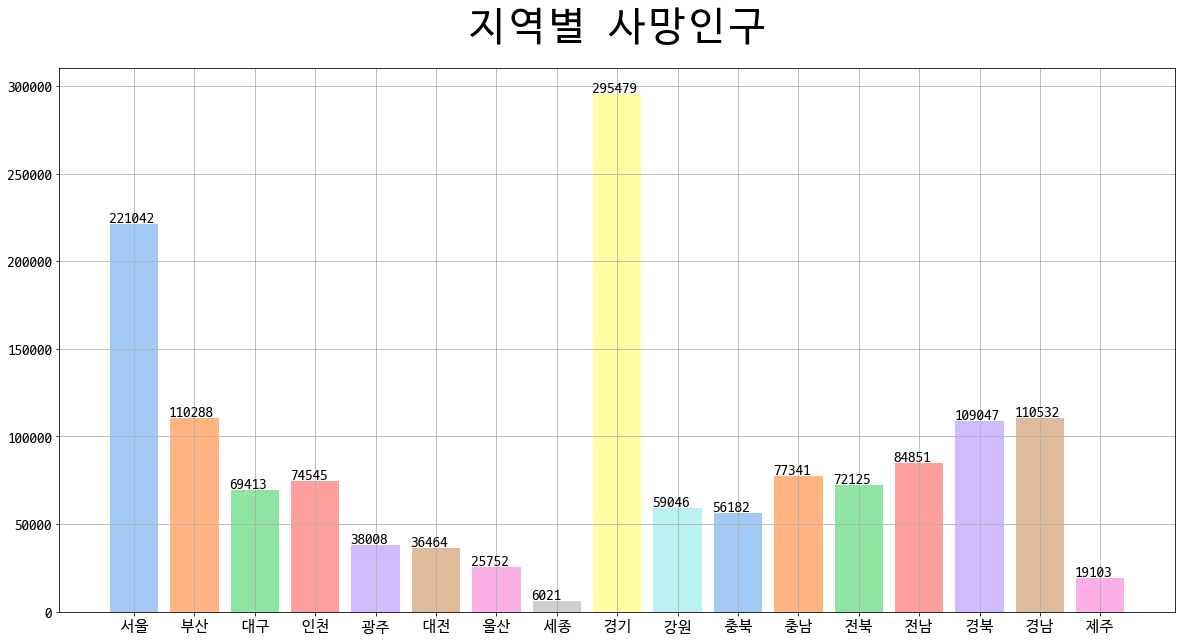

In [11]:
# 사이즈 설정
plt.figure(figsize=(20,10))

# 제목 설정
plt.title('지역별 사망인구', fontsize=40, pad=30)

# 수직 막대 차트
plt.bar(pop_by_city.index, pop_by_city['cause'], color=colors)
for x_v, y_v in enumerate(pop_by_city['cause']):
    plt.text(x_v-0.42, y_v+1000, y_v, fontsize=15)

# 격자 설정
plt.grid(True)

plt.show()

## 3. 연도별 지역 사망인구 비교

### 데이터 추출

In [12]:
# groupby 재정렬
pop_by_year_city = pd.DataFrame(raw_data.groupby(['year', 'city'])['cause'].count())

# index 초기화
pop_by_year_city.reset_index(inplace=True)

# pivot 재구조화
pbyc_df= pop_by_year_city.pivot(index='city', columns='year', values='cause')

# index/column 명 지정
pbyc_df.columns = year
pbyc_df.index = city

pbyc_df

2016   2017   2018   2019   2020
서울  43540  42932  45219  43829  45522
부산  21074  21434  22570  22260  22950
대구  13502  13629  14070  13752  14460
인천  14119  14290  15316  15131  15689
광주   7247   7560   7781   7635   7785
대전   6958   7029   7403   7502   7572
울산   4947   4886   5349   5268   5302
세종   1065   1159   1259   1221   1317
경기  55215  56852  60050  60568  62794
강원  11437  11545  11976  11906  12182
충북  10787  11104  11334  11363  11594
충남  14600  15321  15802  15596  16022
전북  14062  14295  14552  14525  14691
전남  16561  16848  17219  16787  17436
경북  20978  21278  22289  21703  22799
경남  21193  21634  22719  22105  22881
제주   3542   3738   3912   3959   3952

### 시각화

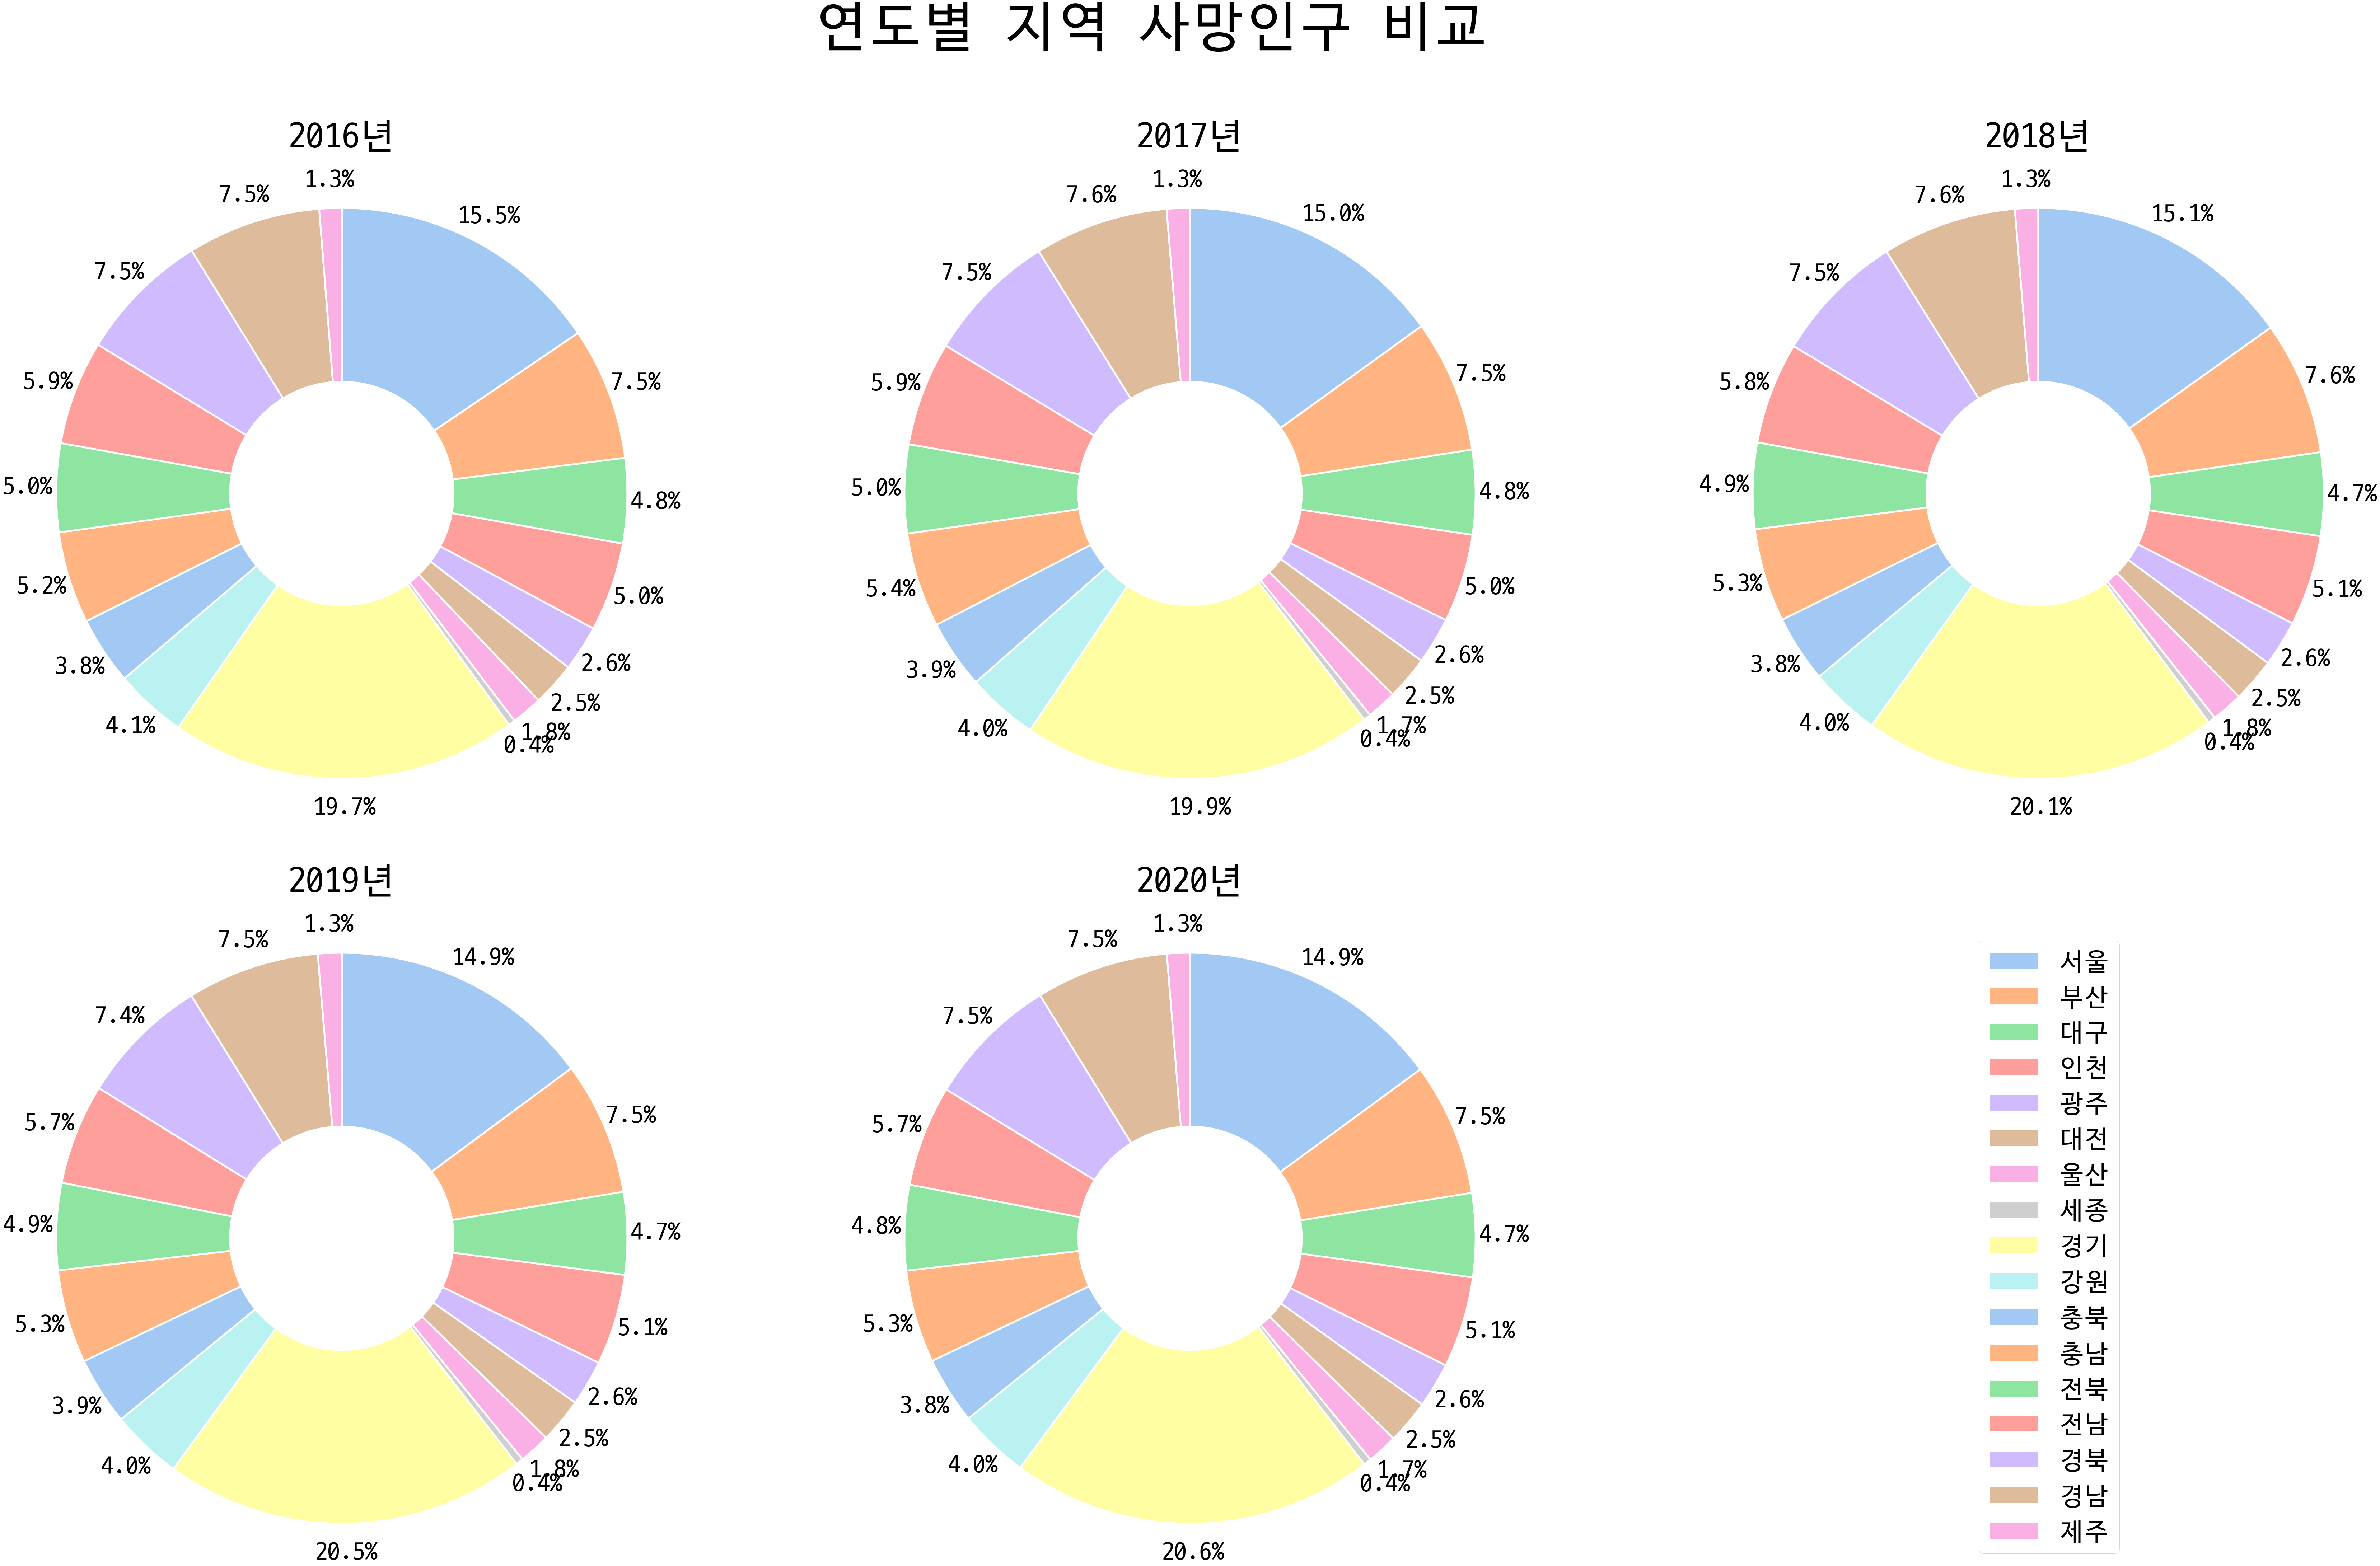

In [13]:
# figure 사이즈 설정
fig = plt.figure(figsize=(120, 70))

# 제목 설정
plt.suptitle('연도별 지역 사망인구 비교', fontsize=150, position = (0.5, 0.98))

# plt의 테두리 삭제
plt.axis('off')  

# 2016년
plt.subplot(2,3,1)
plt.title('2016년', fontsize=100, pad=100)
plt.pie(pbyc_df['2016'],
        autopct='%.1f%%',  # 소수점 표기
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.1,)

# 2017년
plt.subplot(2,3,2)
plt.title('2017년', fontsize=100, pad=100)
plt.pie(pbyc_df['2017'],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.1,)

# 2018년
plt.subplot(2,3,3)
plt.title('2018년', fontsize=100, pad=100)
plt.pie(pbyc_df['2018'],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.1,)

# 2019년
plt.subplot(2,3,4)
plt.title('2019년', fontsize=100, pad=100)
plt.pie(pbyc_df['2019'],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.1,)

# 2020년
plt.subplot(2,3,5)
plt.title('2020년', fontsize=100, pad=100)
plt.pie(pbyc_df['2020'],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.1,)

# 범례
plt.legend(list(city), bbox_to_anchor=(1.75, 1), loc='upper left', fontsize=70)

plt.show()

## 4. 연도별 지역 인구대비 사망율

### 외부 데이터 가져오기

In [14]:
# 인구데이터 불러오기
pop = pd.read_csv('save_data/population.csv')
pop.set_index('city', inplace=True)

# index 지정
pop.index = city

pop

2016      2017      2018      2019      2020
서울   9930616   9857426   9765623   9729107   9668465
부산   3498529   3470653   3441453   3413841   3391946
대구   2484557   2475231   2461769   2438031   2418346
인천   2943069   2948542   2954642   2957026   2942828
광주   1469214   1463770   1459336   1456468   1450062
대전   1514370   1502227   1489936   1474870   1463882
울산   1172304   1165132   1155623   1148019   1136017
세종    243048    280100    314126    340575    355831
경기  12716780  12873895  13077153  13239666  13427014
강원   1550806   1550142   1543052   1541502   1542840
충북   1591625   1594432   1599252   1600007   1600837
충남   2096727   2116770   2126282   2123709   2121029
전북   1864791   1854607   1836832   1818917   1804104
전남   1903914   1896424   1882970   1868745   1851549
경북   2700398   2691706   2676831   2665836   2639422
경남   3373871   3380404   3373988   3362553   3340216
제주    641597    657083    667191    670989    674635

### 데이터 추출

In [15]:
# 데이터 변수 재설정
pbyc_rate_df = pbyc_df

#각 년도 인구 대비 사망율 = 각 년도 지역별 사망인구 / 각 년도 총 인구 * 100
pbyc_rate_df['2016'] = pbyc_rate_df['2016'] / pop['2016'] * 100
pbyc_rate_df['2017'] = pbyc_rate_df['2017'] / pop['2017'] * 100
pbyc_rate_df['2018'] = pbyc_rate_df['2018'] / pop['2018'] * 100
pbyc_rate_df['2019'] = pbyc_rate_df['2019'] / pop['2019'] * 100
pbyc_rate_df['2020'] = pbyc_rate_df['2020'] / pop['2020'] * 100

pbyc_rate_df

2016      2017      2018      2019      2020
서울  0.438442  0.435530  0.463043  0.450494  0.470830
부산  0.602367  0.617578  0.655828  0.652051  0.676603
대구  0.543437  0.550615  0.571540  0.564062  0.597929
인천  0.479737  0.484646  0.518371  0.511697  0.533127
광주  0.493257  0.516475  0.533188  0.524213  0.536874
대전  0.459465  0.467905  0.496867  0.508655  0.517255
울산  0.421990  0.419352  0.462867  0.458877  0.466718
세종  0.438185  0.413781  0.400795  0.358511  0.370120
경기  0.434190  0.441607  0.459198  0.457474  0.467669
강원  0.737487  0.744770  0.776124  0.772364  0.789583
충북  0.677735  0.696424  0.708706  0.710184  0.724246
충남  0.696323  0.723791  0.743175  0.734376  0.755388
전북  0.754079  0.770783  0.792234  0.798552  0.814310
전남  0.869840  0.888409  0.914460  0.898303  0.941698
경북  0.776848  0.790502  0.832664  0.814116  0.863788
경남  0.628151  0.639983  0.673357  0.657387  0.685016
제주  0.552060  0.568878  0.586339  0.590025  0.585798

### 시각화

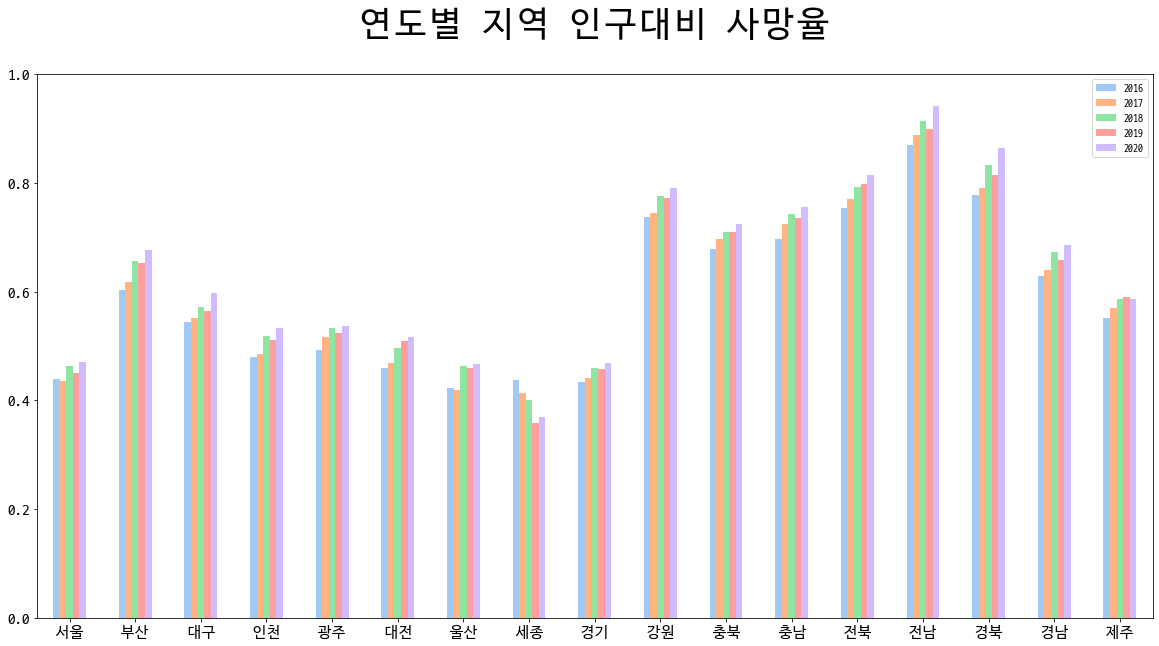

In [16]:
# 수직 막대 차트 생성
pbyc_rate_df.plot(kind='bar', figsize=(20,10), color=colors)

# x, y 축 설정
plt.xticks(rotation=0)
plt.ylim(0, 1)

#제목 설정
plt.title('연도별 지역 인구대비 사망율', fontsize=35, pad=40)

# 범례 설정
plt.legend()
plt.show()

## 5. 연도별 연령 비율

### 필요 컬럼 생성

In [17]:
# 나이에 대한 연령 추출 함수
def age_cut(age):
    X_age = [0,10,20,30,40,50,60]
    for i in range(len(X_age)):
        if age < X_age[i]:
            return X_age[i-1]
        elif age == 999:
            return 999
        elif age >= 60:
            return 60

In [18]:
# 연령대 컬럼 생성
raw_data['age_group'] = [age_cut(e) for e in raw_data['age']]

raw_data

year  city  gender  age  cause  age_group
0        2016    11       1   64     10         60
1        2016    11       1   71      6         60
2        2016    11       1   71     11         60
3        2016    11       1   94     12         60
4        2016    11       1   77     12         60
...       ...   ...     ...  ...    ...        ...
1465234  2020    39       2   78      1         60
1465235  2020    39       2   86      5         60
1465236  2020    39       2   94     12         60
1465237  2020    39       2   87      9         60
1465238  2020    39       2   98      4         60

[1465239 rows x 6 columns]

### 데이터 추출

In [19]:
# 연도, 연령별 인구 수
pop_by_year_age = raw_data.groupby(['year', 'age_group'])['cause'].count()

# 연도 별 인구 수
pop_by_year = raw_data.groupby('year')['cause'].count()

# 연도별 연령 비율 = 연도, 연령별 인구 수 / 연도 별 인구 수 * 100
arby_df = pd.DataFrame(pop_by_year_age / pop_by_year * 100)

arby_df

cause
year age_group           
2016 0           0.582921
     10          0.324399
     20          0.892008
     30          1.846689
     40          4.765924
     50         10.189547
     60         81.383556
     999         0.014956
2017 0           0.515175
     10          0.288232
     20          0.865396
     30          1.719935
     40          4.448507
     50          9.697969
     60         82.450426
     999         0.014359
2018 0           0.444415
     10          0.281440
     20          0.845994
     30          1.695000
     40          4.211231
     50          9.328024
     60         83.179506
     999         0.014390
2019 0           0.417810
     10          0.269052
     20          0.867812
     30          1.662092
     40          4.039172
     50          9.247738
     60         83.472265
     999         0.024059
2020 0           0.328253
     10          0.251190
     20          0.887364
     30          1.560594
     40          3.795401
     50          8.653934
     60         84.514409
     999         0.008854

### 시각화

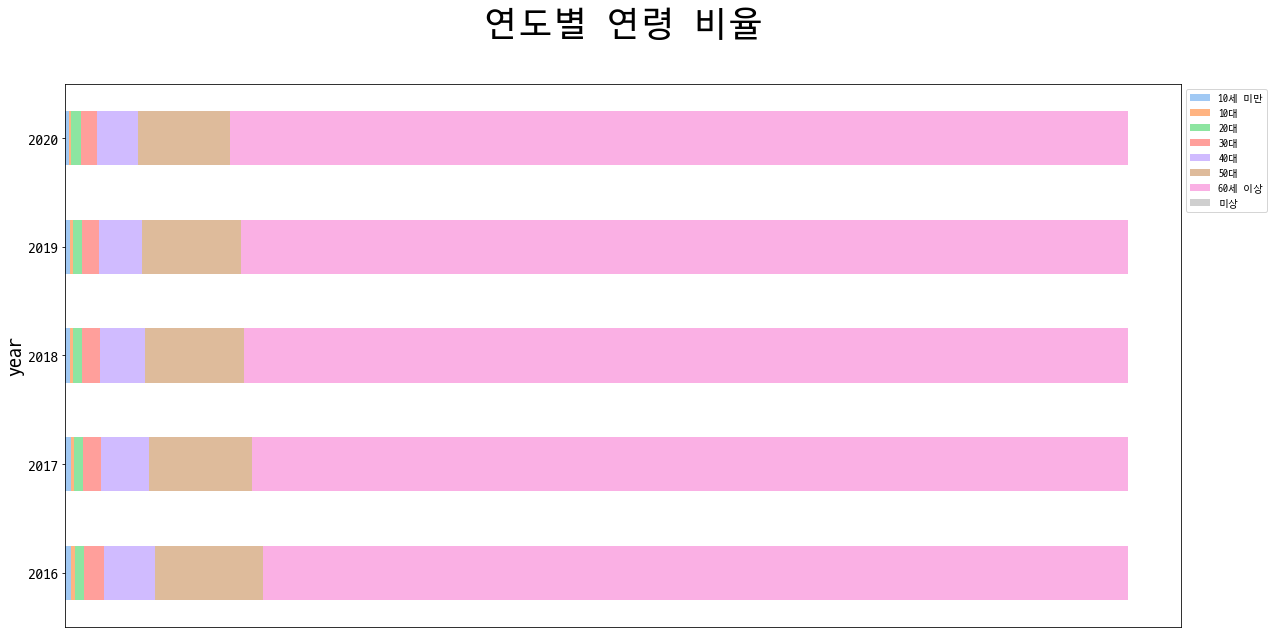

In [20]:
# 수평 막대그래프 생성
arby_df.unstack().plot(kind='barh', figsize=(20,10), stacked=True, color=colors)

# x 축 설정
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

# 제목 설정
plt.title('연도별 연령 비율', fontsize=35, pad=50)

# 범례 설정
plt.legend(list(age), loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## 6. 연도별 사망 원인

### 데이터 추출

In [21]:
# groupby 재정렬
cause_by_year = pd.DataFrame(raw_data.groupby(['year', 'cause'])['city'].count())

# index 초기화
cause_by_year.reset_index(inplace=True)

# pivot 재구조화
cby_df = cause_by_year.pivot(index='cause', columns='year', values='city')

# index/column 명 지정
cby_df.columns = year
cby_df.index = cause

cby_df

2016   2017   2018   2019   2020
감염       7615   7678   8893   8389   9195
암       80283  80890  81320  83398  85256
내분비계    11063  10532  10324   9502  10052
신경계     34256  33942  35758  34490  35650
순환계     37676  39298  40880  39499  41216
호흡계     29181  32382  37043  36403  36112
소화기계    11949  12132  12401  11963  12870
산과        653    555    517    460    367
미분류 내인  25021  25497  28466  28176  31801
자살      13092  12463  13670  13799  13195
외인사     15126  14691  14370  13483  13247
기타      14912  15474  15178  15548  15987

### 시각화

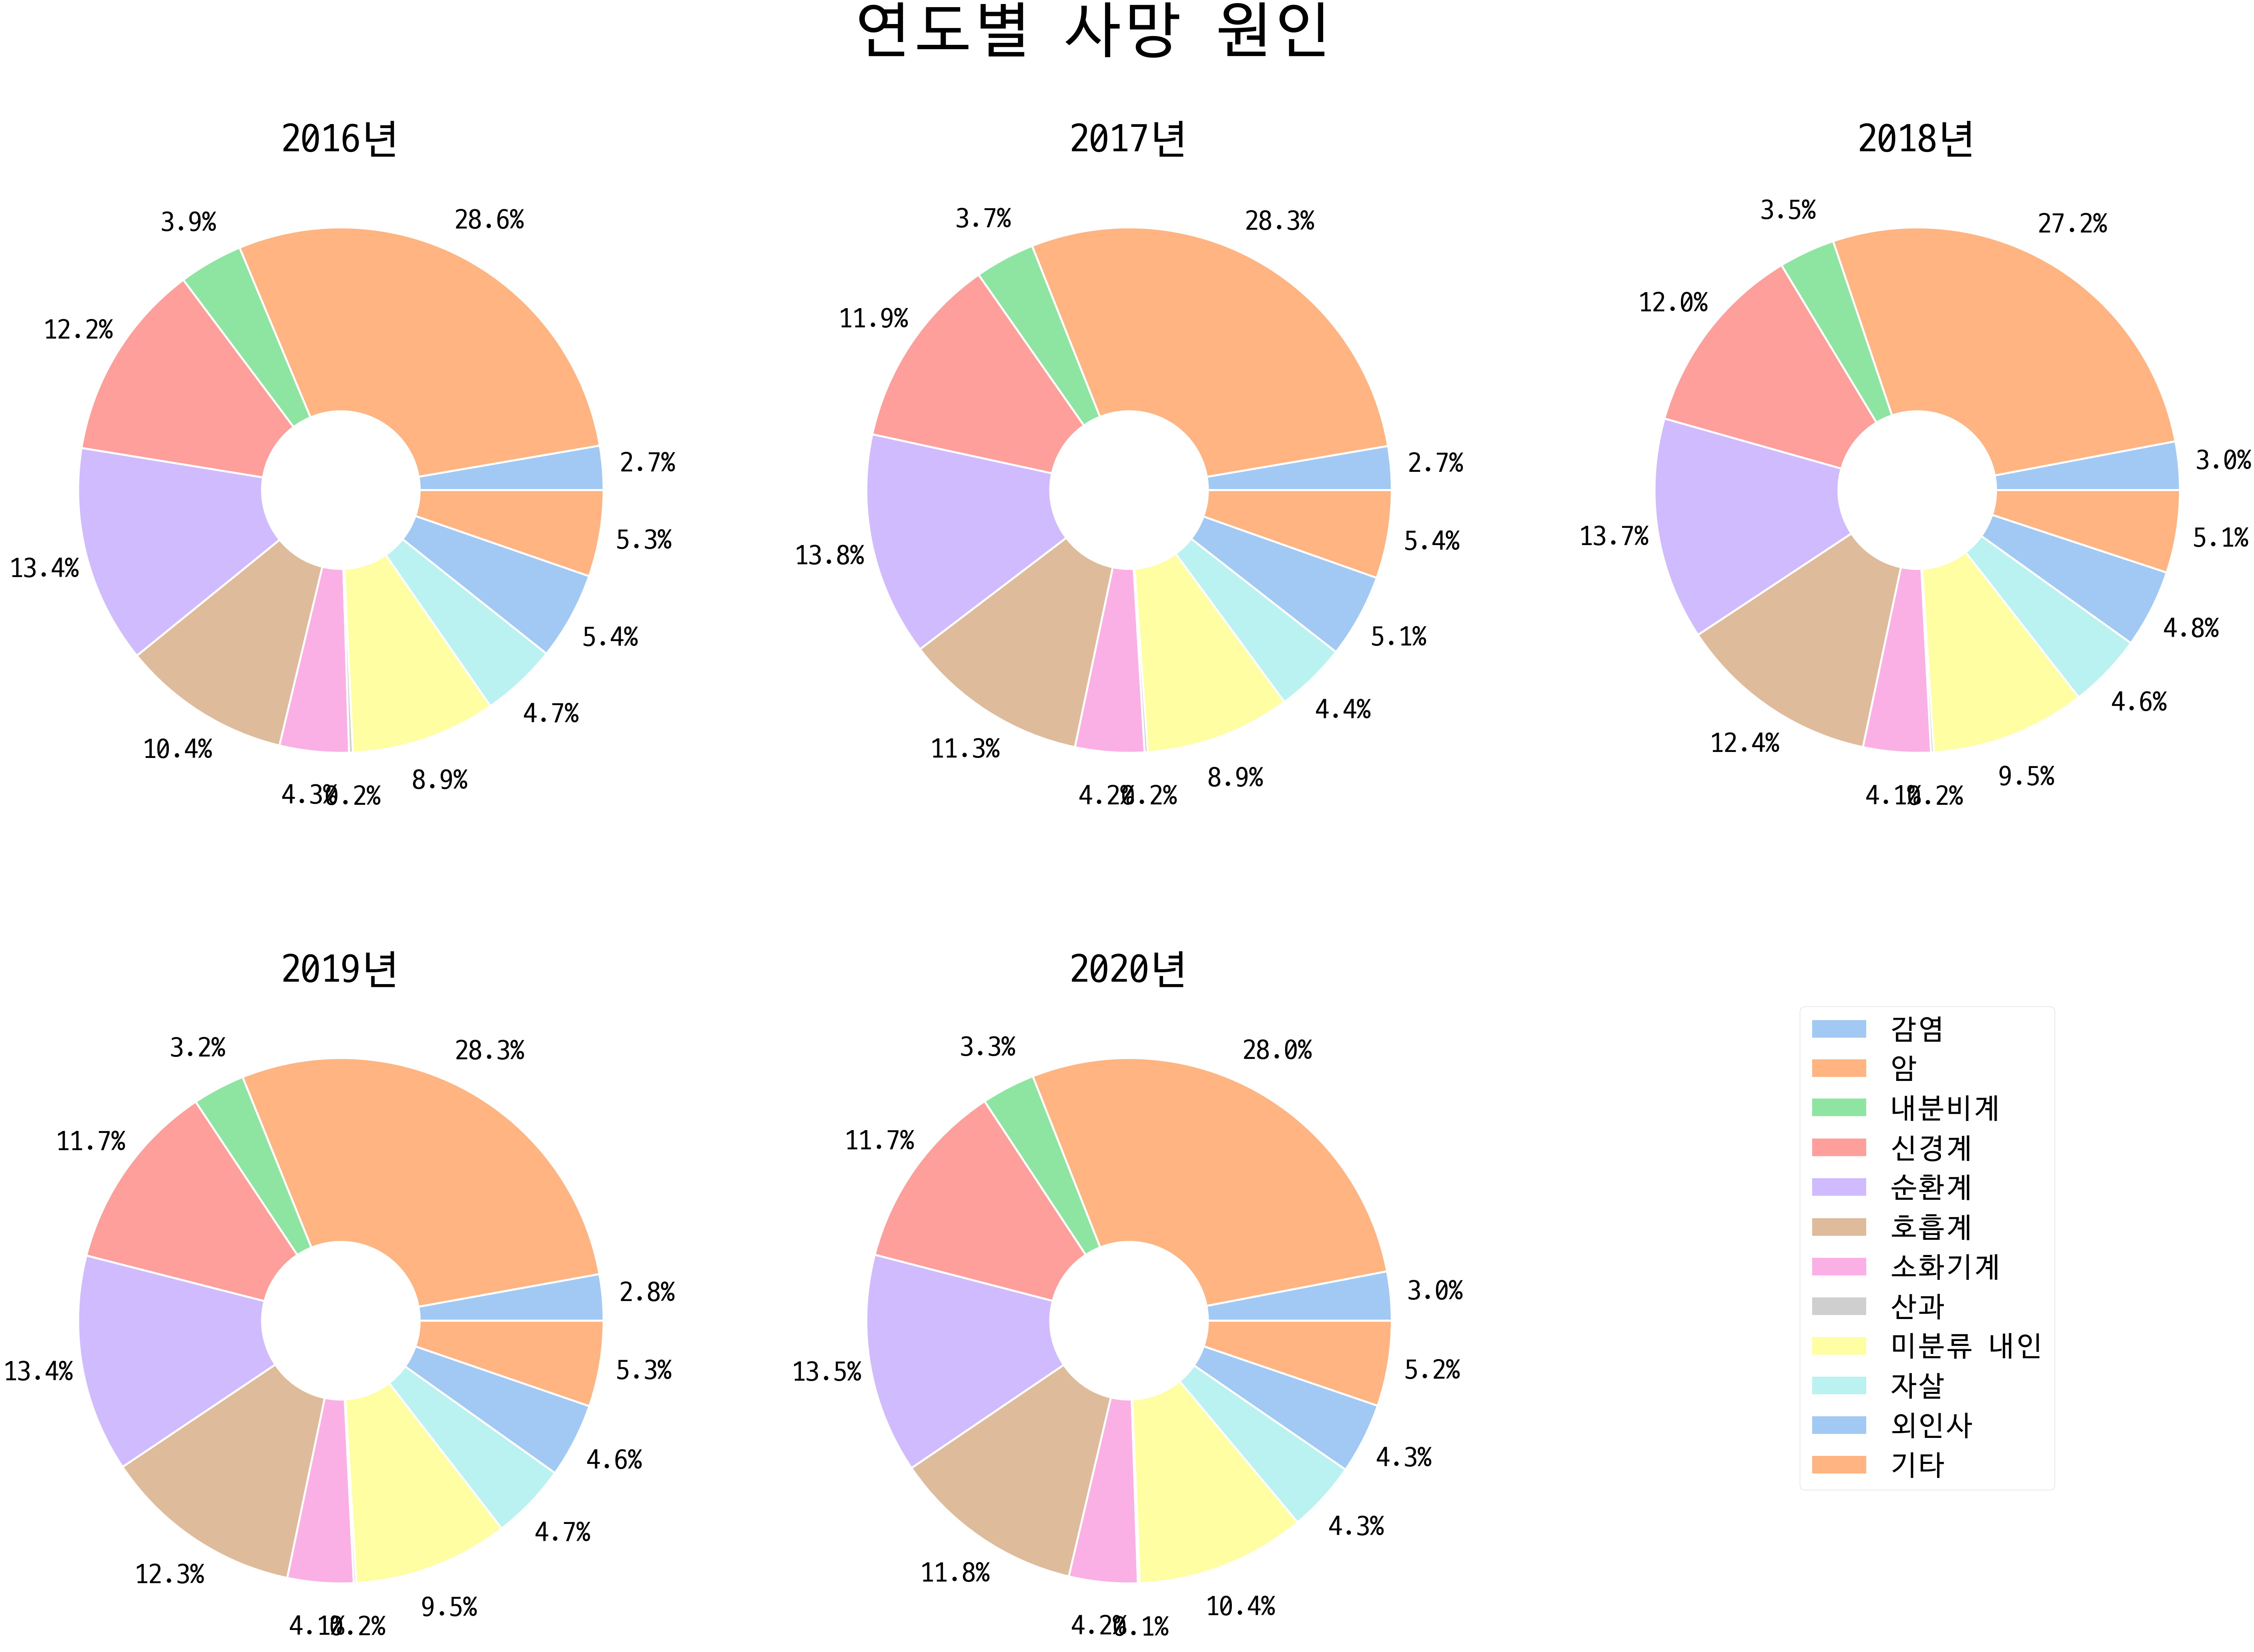

In [22]:
# 사이즈 설정
fig = plt.figure(figsize=(100, 70))

# 제목 설정
plt.suptitle('연도별 사망 원인', fontsize=150, position = (0.5, 0.95))

# plt의 테두리 삭제
plt.axis('off')  

# 2016년
plt.subplot(2,3,1)
plt.title("2016년", fontsize=100, pad=25)
plt.pie(cby_df['2016'],
        autopct='%.1f%%', # 소수점 자리 지정
        pctdistance=1.17,
        wedgeprops=wedgeprops,
        colors=colors,
        textprops={'size': 70})


# 2017년
plt.subplot(2,3,2)
plt.title("2017년", fontsize=100, pad=25)
plt.pie(cby_df['2017'],
        autopct='%.1f%%',
        pctdistance=1.17,
        wedgeprops=wedgeprops,
        colors=colors,
        textprops={'size': 70})

# 2018년
plt.subplot(2,3,3)
plt.title("2018년", fontsize=100, pad=25)
plt.pie(cby_df['2018'],
        autopct='%.1f%%',
        pctdistance=1.17,
        wedgeprops=wedgeprops,
        colors=colors,
        textprops={'size': 70})

# 2019년
plt.subplot(2,3,4)
plt.title("2019년", fontsize=100, pad=25)
plt.pie(cby_df['2019'],
        autopct='%.1f%%',
        pctdistance=1.17,
        wedgeprops=wedgeprops,
        colors=colors,
        textprops={'size': 70})

# 2020년
plt.subplot(2,3,5)
plt.title("2020년", fontsize=100, pad=25)
plt.pie(cby_df['2020'],
        autopct='%.1f%%',
        pctdistance=1.17,
        wedgeprops=wedgeprops,
        colors=colors,
        textprops={'size': 70})

# 범례 설정
plt.legend(list(cause), bbox_to_anchor=(1.5, 1), loc='upper left', fontsize=70)

plt.show()

## 7. 성별 사망 원인

### 데이터 추출

In [23]:
# 전체 사망원인 데이터
cause_df = pd.DataFrame(raw_data.groupby(['cause'])['cause'].count()).T

# 성별 재정렬
cause_by_gender = pd.DataFrame(raw_data.groupby(['gender','cause'])['city'].count())

# 성별 데이터 index 재설정
cause_by_gender.reset_index(inplace=True)

# 성별 데이터 pivot 재구조
cbg_df = cause_by_gender.pivot(index='gender', columns='cause', values='city')

# 전체 사망원인 / 성별 사망원인 데이터 결합
concat_df = pd.concat([cause_df, cbg_df], ignore_index=True)

# 컬럼명 설정
concat_df.columns = cause
concat_df.index = ['전체', '남성', '여성']

concat_df

감염       암   내분비계     신경계     순환계     호흡계   소화기계    산과  미분류 내인     자살  \
전체  41770  411147  51473  174096  198569  171121  61315  2552  138961  66219   
남성  19643  253411  25806   78974   92002   95721  38033  1359   60856  46850   
여성  22127  157736  25667   95122  106567   75400  23282  1193   78105  19369   

      외인사     기타  
전체  70917  77099  
남성  47528  33346  
여성  23389  43753

### 시각화

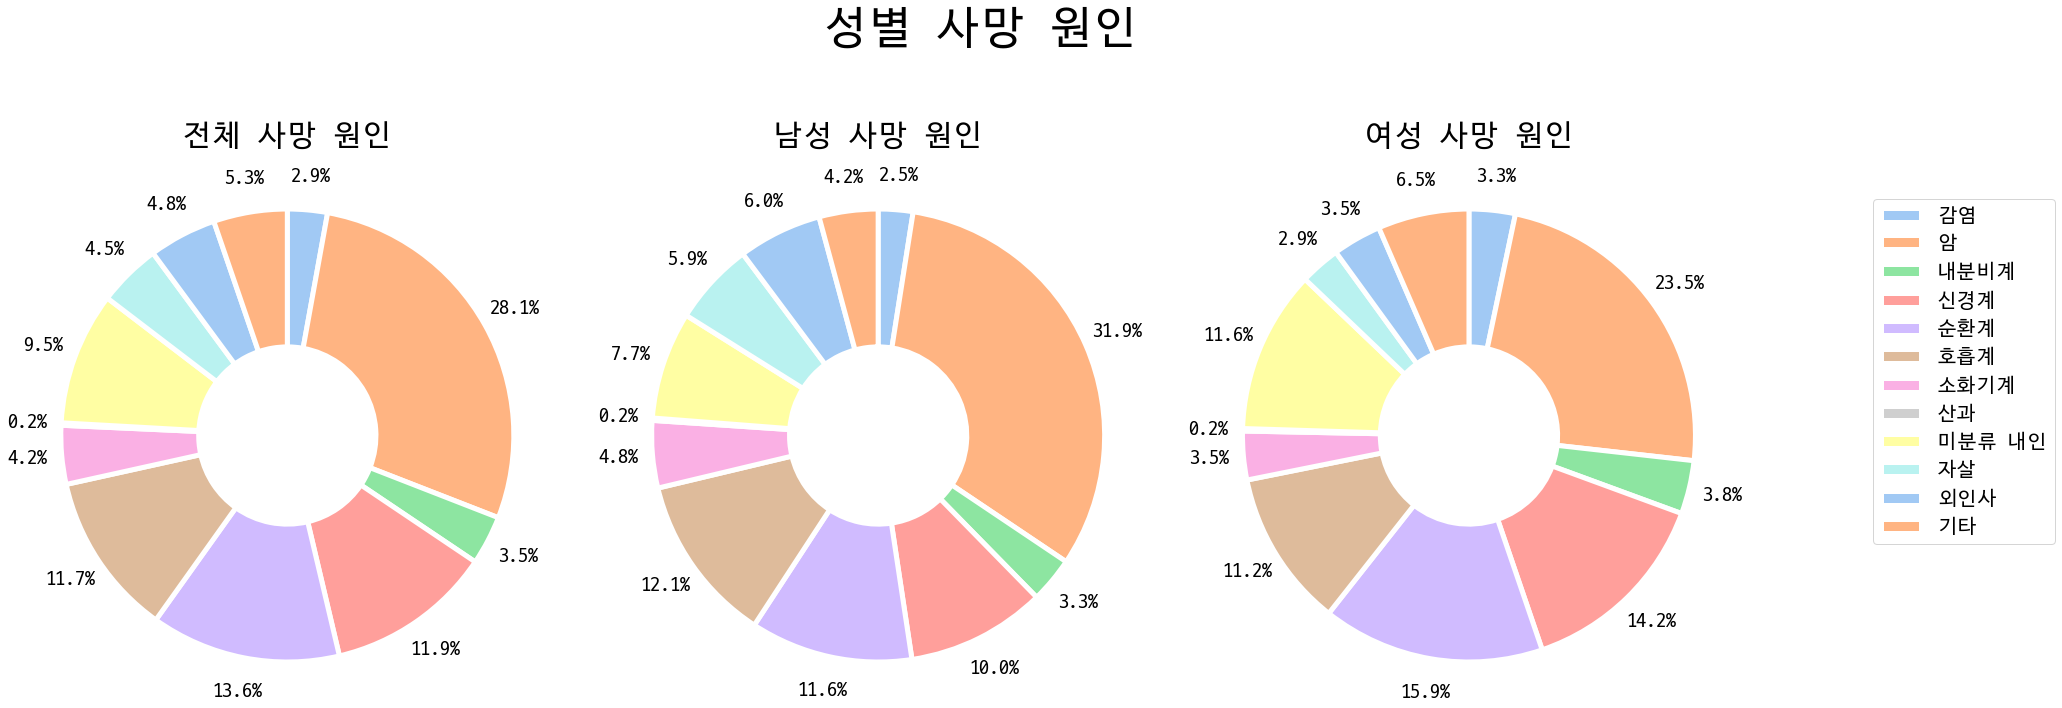

In [24]:
# size 설정
plt.figure(figsize=(30,20))

# 제목 설정
plt.suptitle('성별 사망 원인', fontsize=45, position = (0.56, 0.8))

# 전체 사망 원인
plt.subplot(1,3,1)
plt.title('전체 사망 원인', fontsize=30, pad=45)
plt.pie(concat_df.iloc[0],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 20},
        radius=1.15,
        pctdistance=1.15)

# 남성
plt.subplot(1,3,2)
plt.title('남성 사망 원인', fontsize=30, pad=45)
plt.pie(concat_df.iloc[1],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 20},
        radius=1.15,
        pctdistance=1.15)

# 여성
plt.subplot(1,3,3)
plt.title('여성 사망 원인', fontsize=30, pad=45)
plt.pie(concat_df.iloc[2],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 20},
        radius=1.15,
        pctdistance=1.15)

# 범례 설정
plt.legend(list(cause), loc='upper left', bbox_to_anchor=(1.3, 1), fontsize=20)

plt.show()

## 8. 연령별 사망 원인 비교

### 데이터 추출

In [25]:
# groupby 재정렬
cause_by_age_grop = pd.DataFrame(raw_data.groupby(['age_group', 'cause'])['city'].count())

# index 초기화
cause_by_age_grop.reset_index(inplace=True)

# pivot 재구조화
cbyag_df = cause_by_age_grop.pivot(index='age_group', columns='cause', values='city').fillna(0) # 결측치 제거

# index/column 명 지정
cbyag_df.columns = cause
cbyag_df.index = age

cbyag_df

감염         암     내분비계       신경계       순환계       호흡계     소화기계  \
10세 미만     98.0     479.0     74.0     403.0     266.0     110.0     47.0   
10대        30.0     650.0     44.0     402.0     219.0      78.0     30.0   
20대       118.0    1432.0    154.0     630.0     588.0     176.0    171.0   
30대       282.0    5021.0    375.0    1428.0    1683.0     368.0   1325.0   
40대      1117.0   18198.0   1419.0    4531.0    5335.0    1222.0   5792.0   
50대      2762.0   52359.0   4140.0   10585.0   12943.0    4447.0  12125.0   
60세 이상  37356.0  332995.0  45261.0  156098.0  177501.0  164690.0  41817.0   
미상          7.0      13.0      6.0      19.0      34.0      30.0      8.0   

            산과    미분류 내인       자살      외인사       기타  
10세 미만  2369.0     862.0      6.0    934.0   1022.0  
10대        2.0     124.0   1440.0   1004.0    112.0  
20대       28.0     535.0   6172.0   2506.0    261.0  
30대      140.0    1233.0   9455.0   2965.0    551.0  
40대       13.0    4210.0  12656.0   5720.0   1951.0  
50대        0.0    9032.0  13500.0  11113.0   4855.0  
60세 이상     0.0  122895.0  22982.0  46662.0  68331.0  
미상         0.0      70.0      8.0     13.0     16.0

### 시각화

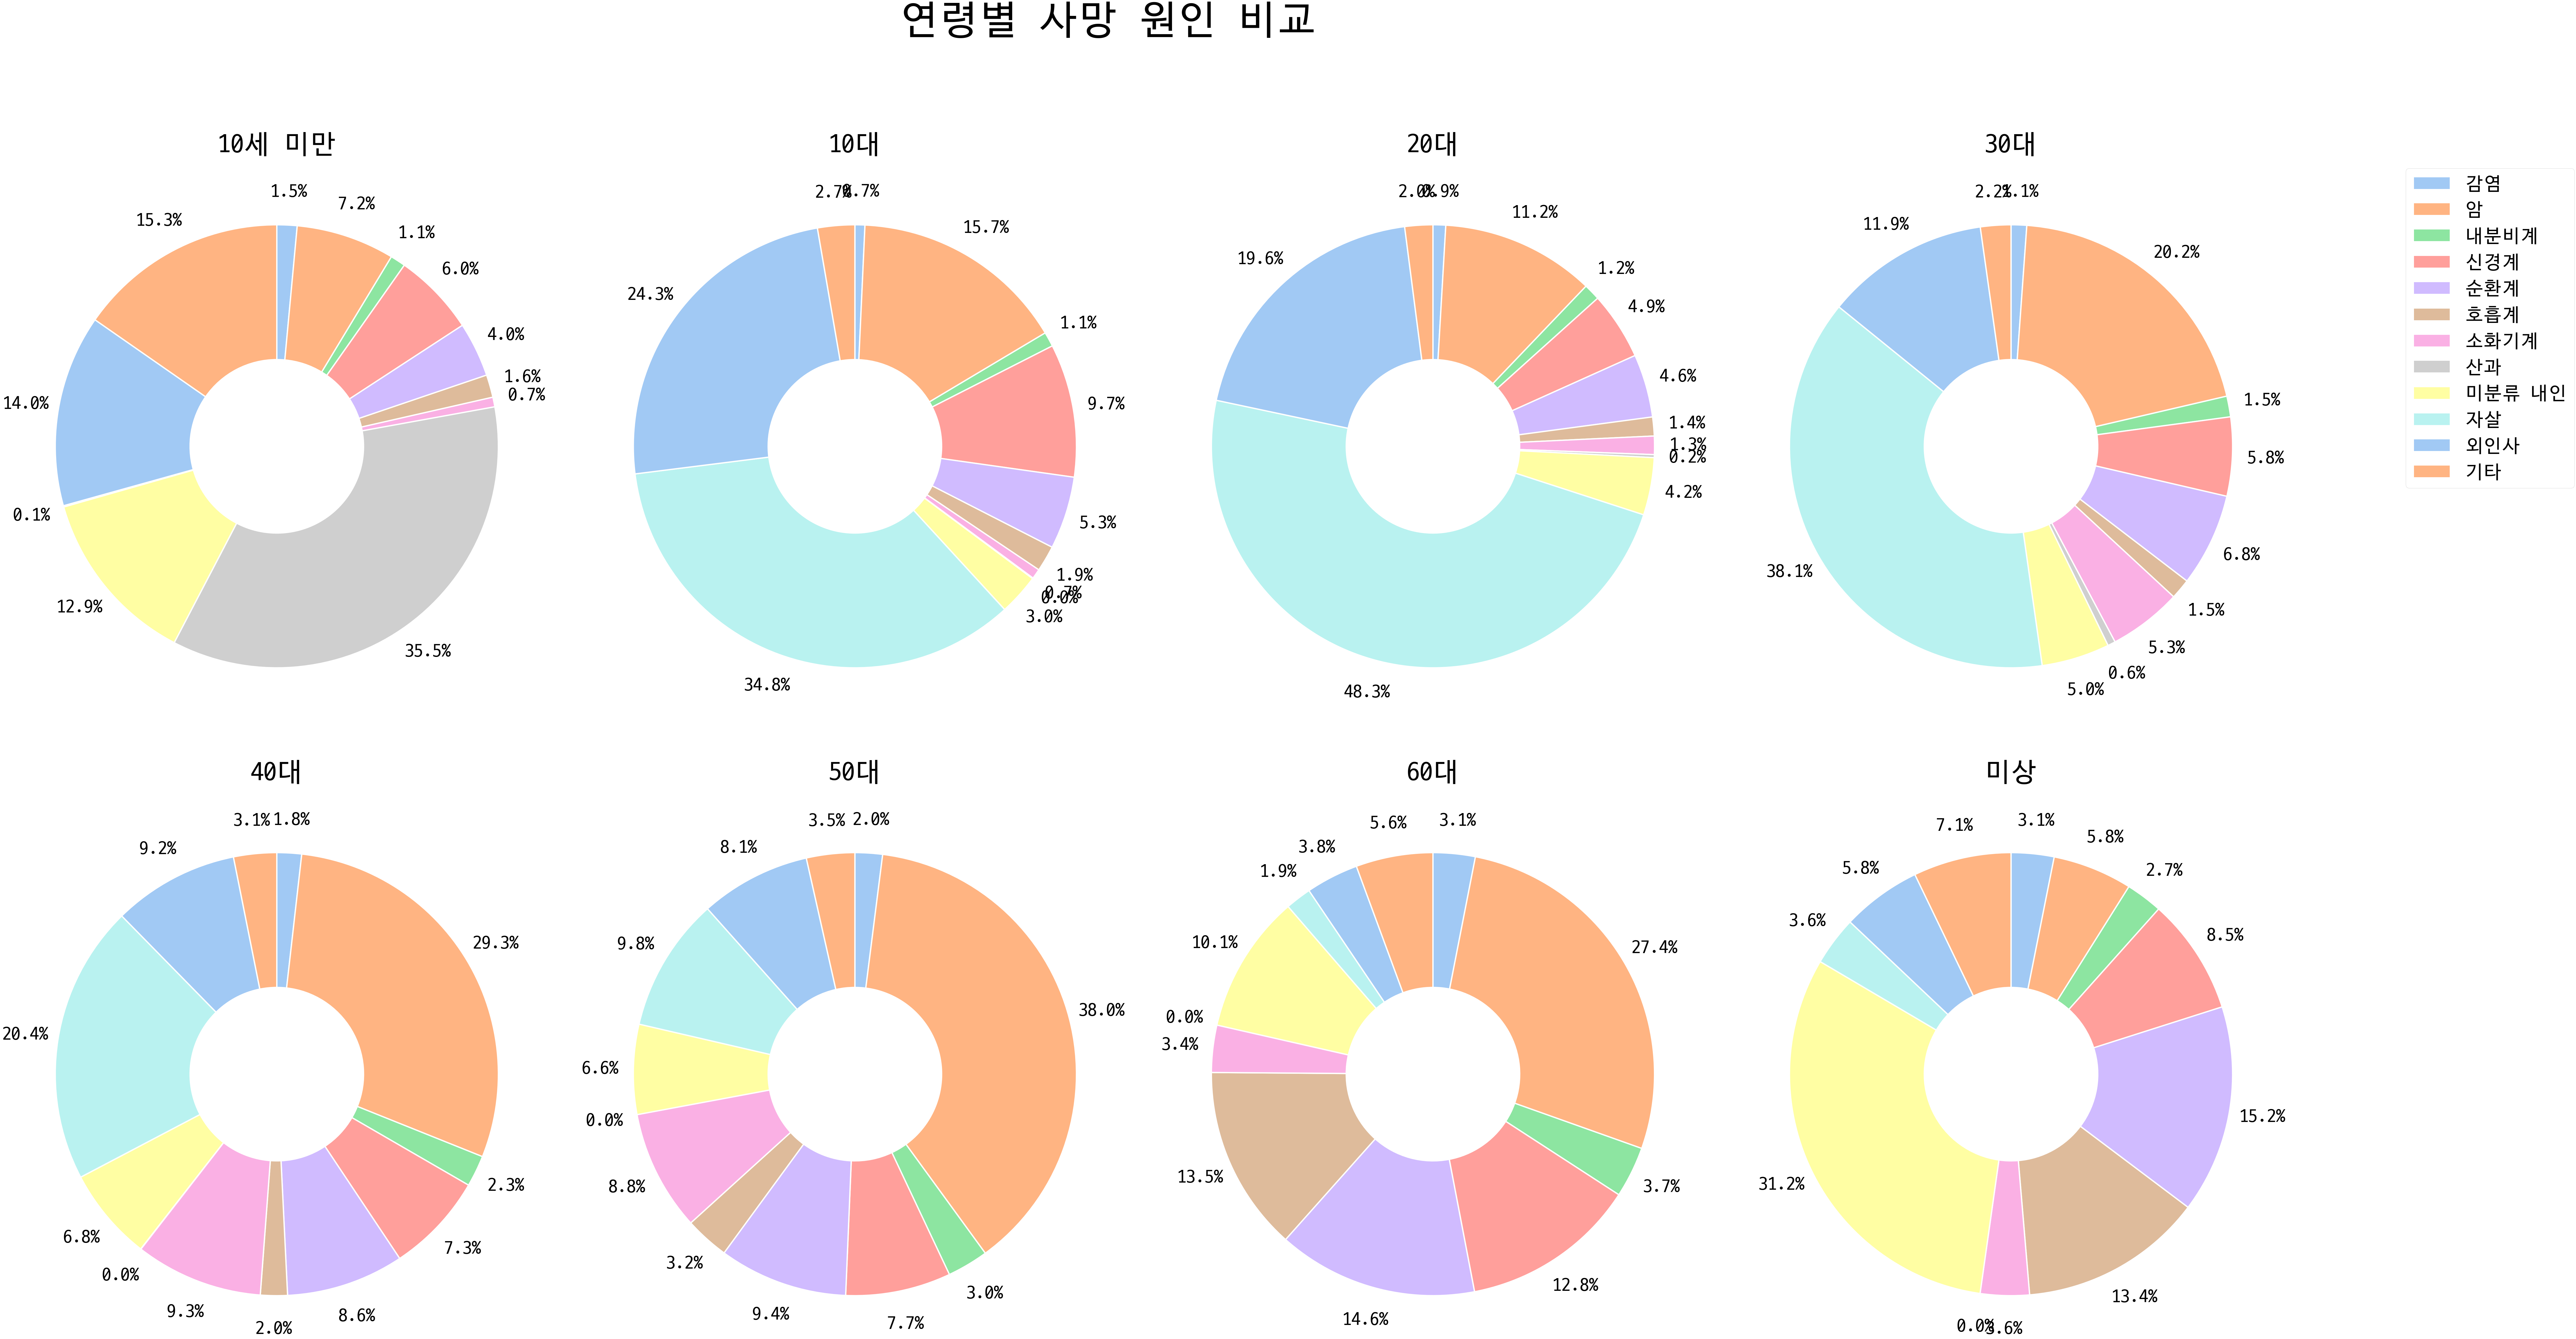

In [26]:
# figure size 설정
plt.figure(figsize=(150,80))

# 전체 제목 설정
plt.suptitle('연령별 사망 원인 비교', fontsize=150, position = (0.5, 1))

# 10세 미만
plt.subplot(2,4,1)
plt.title('10세 미만', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[0],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 10대
plt.subplot(2,4,2)
plt.title('10대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[1],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 20대
plt.subplot(2,4,3)
plt.title('20대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[2],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 30대
plt.subplot(2,4,4)
plt.title('30대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[3],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 40대
plt.subplot(2,4,5)
plt.title('40대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[4],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 50대
plt.subplot(2,4,6)
plt.title('50대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[5],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 60대
plt.subplot(2,4,7)
plt.title('60대', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[6],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 미상
plt.subplot(2,4,8)
plt.title('미상', fontsize=100, pad=200)
plt.pie(cbyag_df.iloc[7],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops=wedgeprops,
        textprops={'size': 70},
        radius=1.15,
        pctdistance=1.15)

# 범례 설정
plt.legend(list(cause), loc='upper left', bbox_to_anchor=(1.3, 2.4), fontsize=70)
plt.show()